In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
# df = df.dropna()
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
from xgboost import XGBClassifier
model = XGBClassifier(early_stopping_rounds=10)

c:\Users\sasaco\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [4]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True)

[22:18:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:18:53] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.56796
[1]	validation_0-logloss:0.50668
[2]	validation_0-logloss:0.47171
[3]	validation_0-logloss:0.45235


c:\Users\sasaco\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\sasaco\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[4]	validation_0-logloss:0.44228
[5]	validation_0-logloss:0.43555
[6]	validation_0-logloss:0.43029
[7]	validation_0-logloss:0.42767
[8]	validation_0-logloss:0.43030
[9]	validation_0-logloss:0.43527
[10]	validation_0-logloss:0.44048
[11]	validation_0-logloss:0.43952
[12]	validation_0-logloss:0.44385
[13]	validation_0-logloss:0.44327
[14]	validation_0-logloss:0.44647
[15]	validation_0-logloss:0.44569
[16]	validation_0-logloss:0.44587
[17]	validation_0-logloss:0.44599
[18]	validation_0-logloss:0.45203
[19]	validation_0-logloss:0.45117
[20]	validation_0-logloss:0.45276
[21]	validation_0-logloss:0.45797
[22]	validation_0-logloss:0.46001
[23]	validation_0-logloss:0.46270
[24]	validation_0-logloss:0.46744
[25]	validation_0-logloss:0.46731
[26]	validation_0-logloss:0.46981
[27]	validation_0-logloss:0.46777
[28]	validation_0-logloss:0.46903
[29]	validation_0-logloss:0.46933
[30]	validation_0-logloss:0.46956
[31]	validation_0-logloss:0.47064
[32]	validation_0-logloss:0.47035
[33]	validation_0-lo

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [5]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

0.5544826703561155

<BarContainer object of 22 artists>

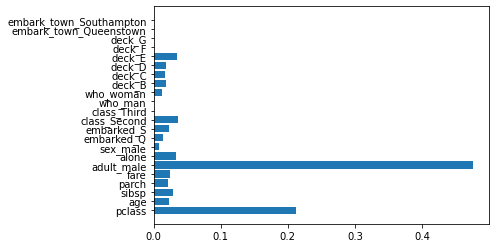

In [6]:
import matplotlib.pyplot as plt
model.feature_importances_
plt.barh(X.columns, model.feature_importances_)